In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error

In [2]:
ds = pd.read_csv('CO2 Emissions_Canada.csv')

In [3]:
ds.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
ds.rename(columns={'CO2 Emissions(g/km)':'CO2_emission'}, inplace=True)

In [5]:
ds.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2_emission                      7385 non-null   int64  
dtypes: flo

In [7]:
# checking for unique variables
print(ds['Make'].unique())

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


In [8]:
print(ds['Model'].unique())

['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']


In [9]:
# Putting different transmission sub-catagories into their respective catagories


ds['Transmission'] = np.where(ds['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',ds['Transmission'])
ds['Transmission'] = np.where(ds['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',ds['Transmission'])
ds['Transmission'] = np.where(ds['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',ds['Transmission'])
ds['Transmission'] = np.where(ds['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',ds['Transmission'])
ds['Transmission'] = np.where(ds['Transmission'].isin(['M5','M6','M7']),'Manual',ds['Transmission'])

print(ds['Transmission'].unique())

['Automatic of Selective type' 'Manual' 'CVT' 'Automated Manual'
 'Automatic']


In [10]:
# Renaming fuel types for better understanding

print(ds['Fuel Type'].value_counts())

ds['Fuel Type']= np.where(ds['Fuel Type']=='X','Regular gasoline',ds['Fuel Type'])
ds['Fuel Type']= np.where(ds['Fuel Type']=='Z','Premium gasoline',ds['Fuel Type'])
ds['Fuel Type']= np.where(ds['Fuel Type']=='E','Ethanol',ds['Fuel Type'])
ds['Fuel Type']= np.where(ds['Fuel Type']=='D','Diesel',ds['Fuel Type'])
ds['Fuel Type']= np.where(ds['Fuel Type']=='N','Natural gas',ds['Fuel Type'])

print(ds['Fuel Type'].unique())

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64
['Premium gasoline' 'Diesel' 'Regular gasoline' 'Ethanol' 'Natural gas']


In [11]:
print(ds['Vehicle Class'].unique())

['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


In [12]:
ds.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244


In [13]:
ds.shape

(7385, 12)

In [14]:
# Checking for total null values if any

ds.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2_emission                        0
dtype: int64

In [15]:
# Insight of different statistical distribution of features and label

ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2_emission,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [16]:
ds.corr()['CO2_emission'].sort_values()

<ipython-input-16-09146e19f466>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.corr()['CO2_emission'].sort_values()


Fuel Consumption Comb (mpg)        -0.907426
Cylinders                           0.832644
Engine Size(L)                      0.851145
Fuel Consumption Hwy (L/100 km)     0.883536
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption City (L/100 km)    0.919592
CO2_emission                        1.000000
Name: CO2_emission, dtype: float64

In [17]:
# Correlation between features and label

ds.corr()

<ipython-input-17-27be8fb639e1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.corr()


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2_emission,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


<ipython-input-18-899e403ff2cd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ds.corr()


Text(0.5, 1.0, 'Correlation')

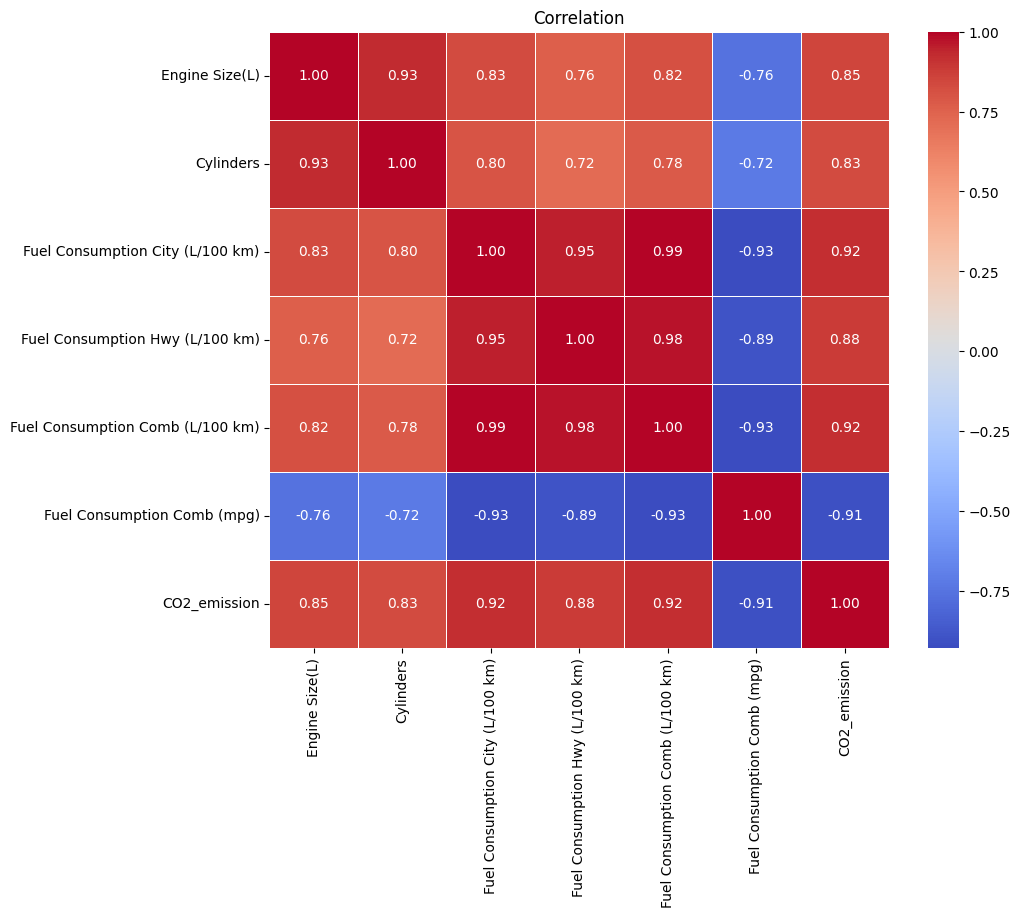

In [18]:
# VISUALISATIONS

corr = ds.corr()

plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

array([[<Axes: title={'center': 'Engine Size(L)'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Fuel Consumption City (L/100 km)'}>],
       [<Axes: title={'center': 'Fuel Consumption Hwy (L/100 km)'}>,
        <Axes: title={'center': 'Fuel Consumption Comb (L/100 km)'}>,
        <Axes: title={'center': 'Fuel Consumption Comb (mpg)'}>],
       [<Axes: title={'center': 'CO2_emission'}>, <Axes: >, <Axes: >]],
      dtype=object)

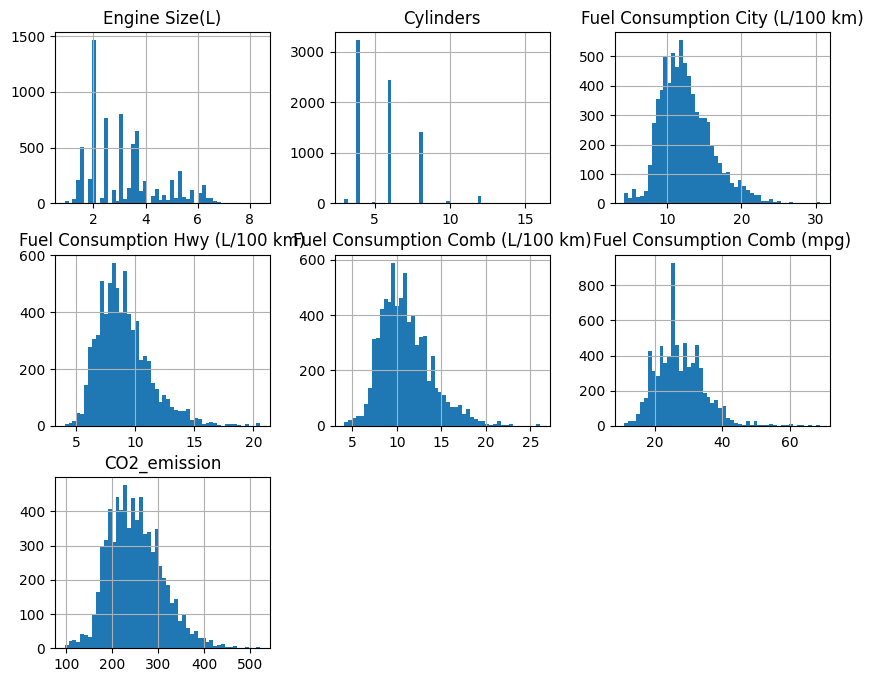

In [19]:
# distribution of numerical features
# we can seee that the numerical features are little ight skewed.

ds.hist(figsize=(10,8),bins=50)

In [20]:
ds.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244


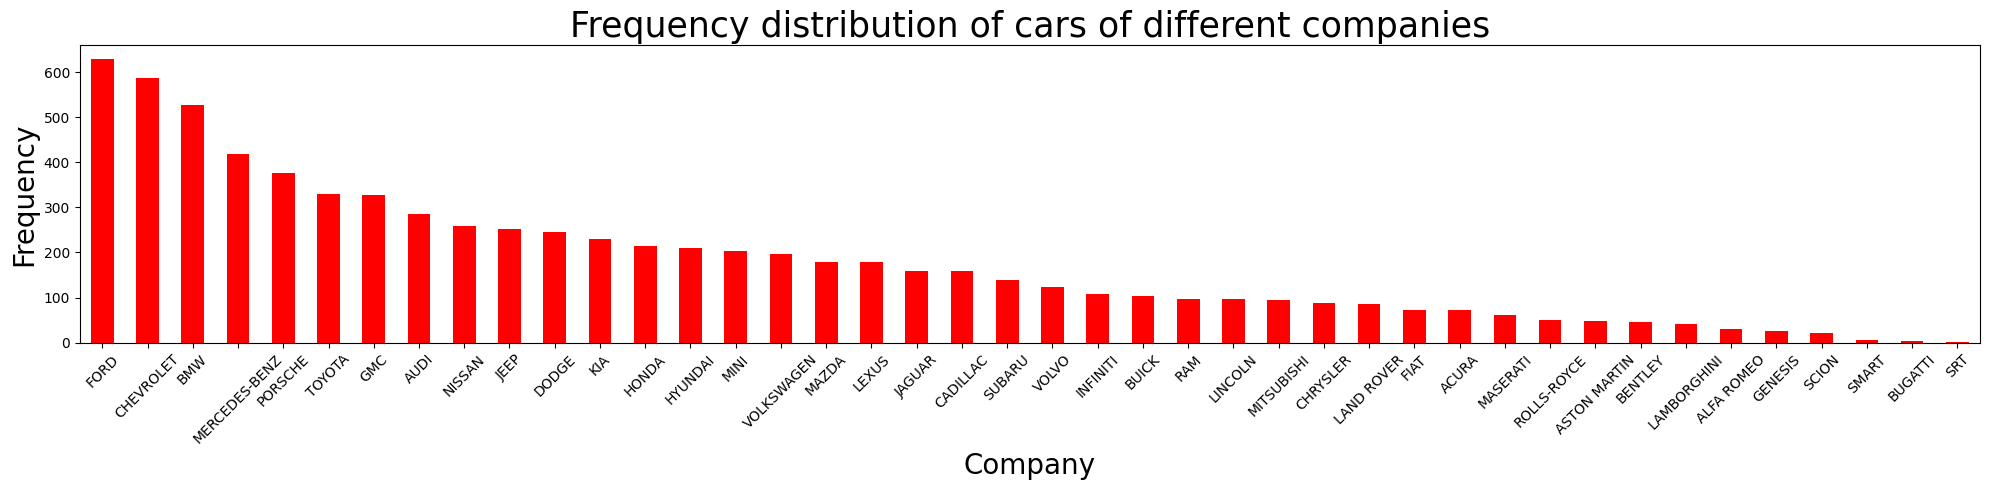

In [21]:
# MAKE
plt.figure(figsize=(20,5))

ds.groupby('Make')['Make'].count().sort_values(ascending=False).plot(kind='bar',color='red')

plt.title('Frequency distribution of cars of different companies', fontsize=25)
plt.xlabel('Company', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

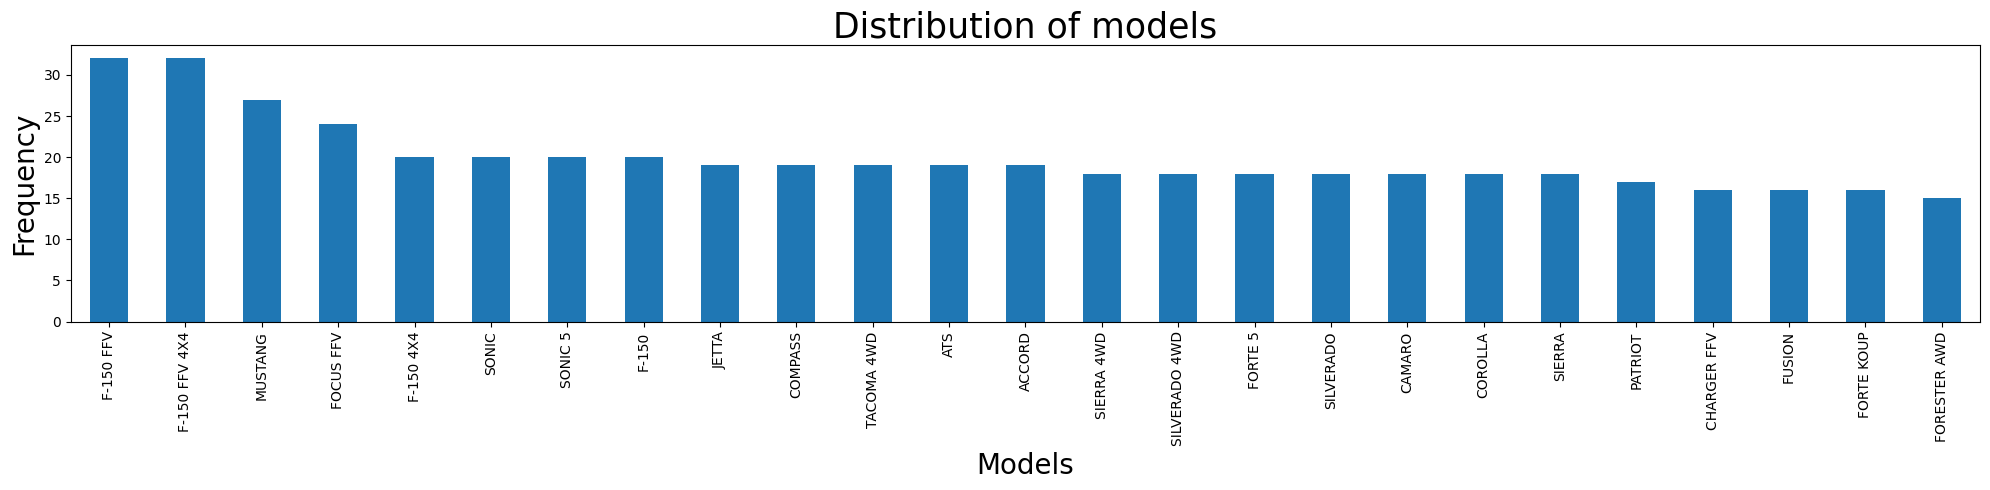

In [22]:
# MODEL
plt.figure(figsize=(20,5))

ds.groupby('Model')['Model'].count().sort_values(ascending=False)[:25].plot(kind='bar')

plt.title('Distribution of models', fontsize=25)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

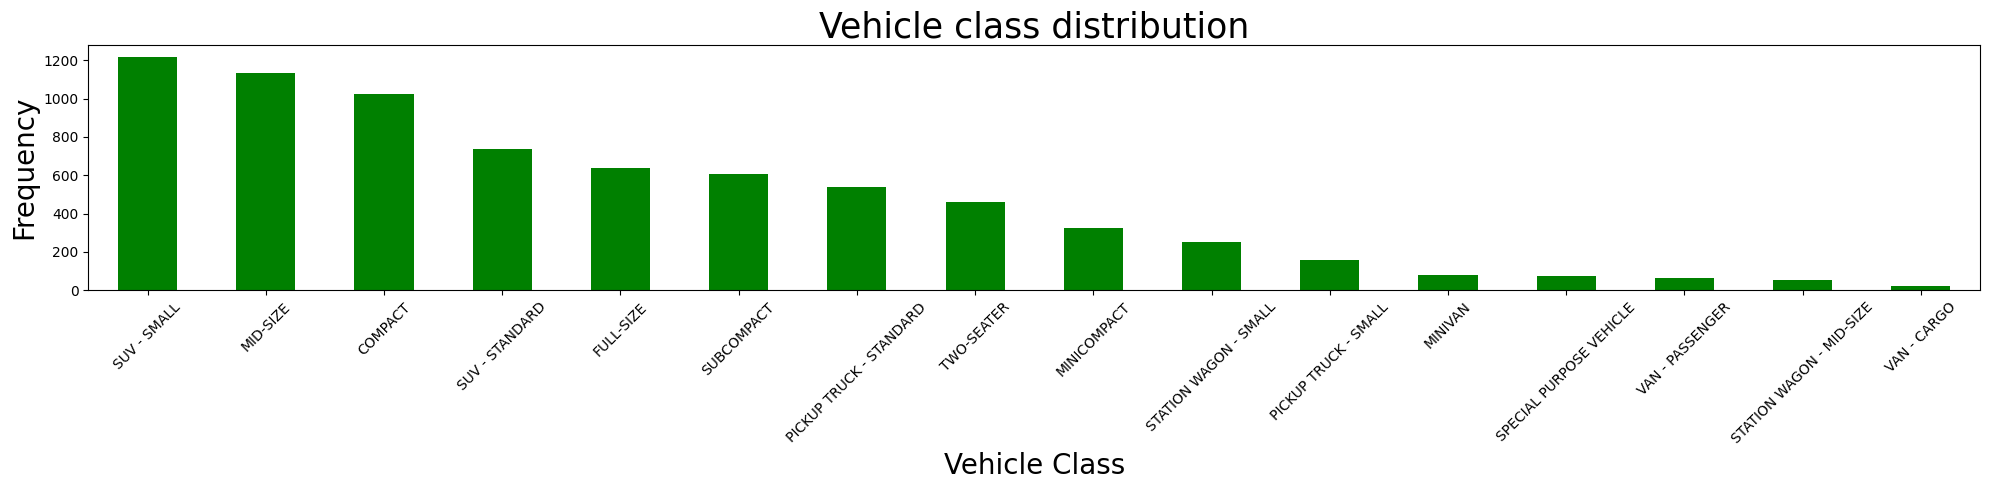

In [23]:
# Vehicle Class

plt.figure(figsize=(20,5))

ds.groupby('Vehicle Class')['Vehicle Class'].count().sort_values(ascending=False).plot(kind='bar', color='green')

plt.title('Vehicle class distribution', fontsize=25)
plt.xlabel('Vehicle Class', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

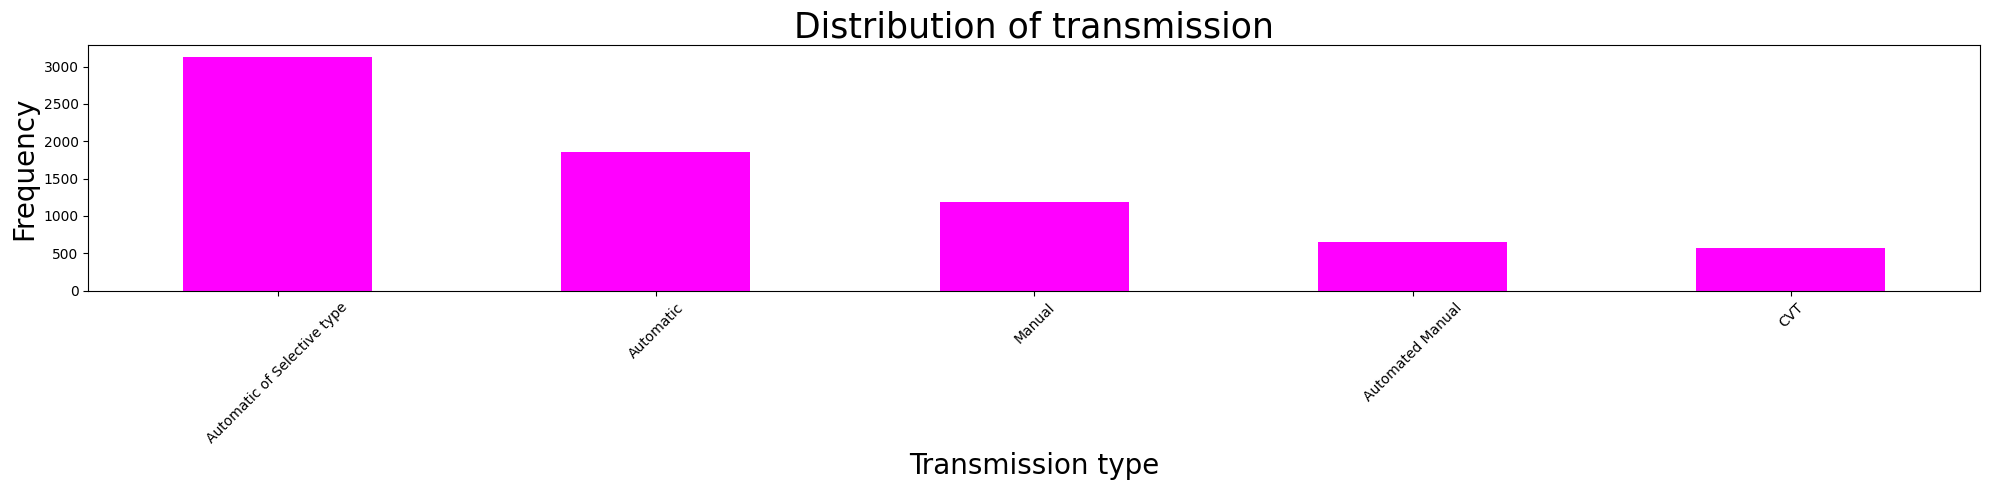

In [24]:
# Transmission

plt.figure(figsize=(20,5))

ds.groupby('Transmission')['Transmission'].count().sort_values(ascending=False).plot(kind='bar', color='magenta')

plt.title('Distribution of transmission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

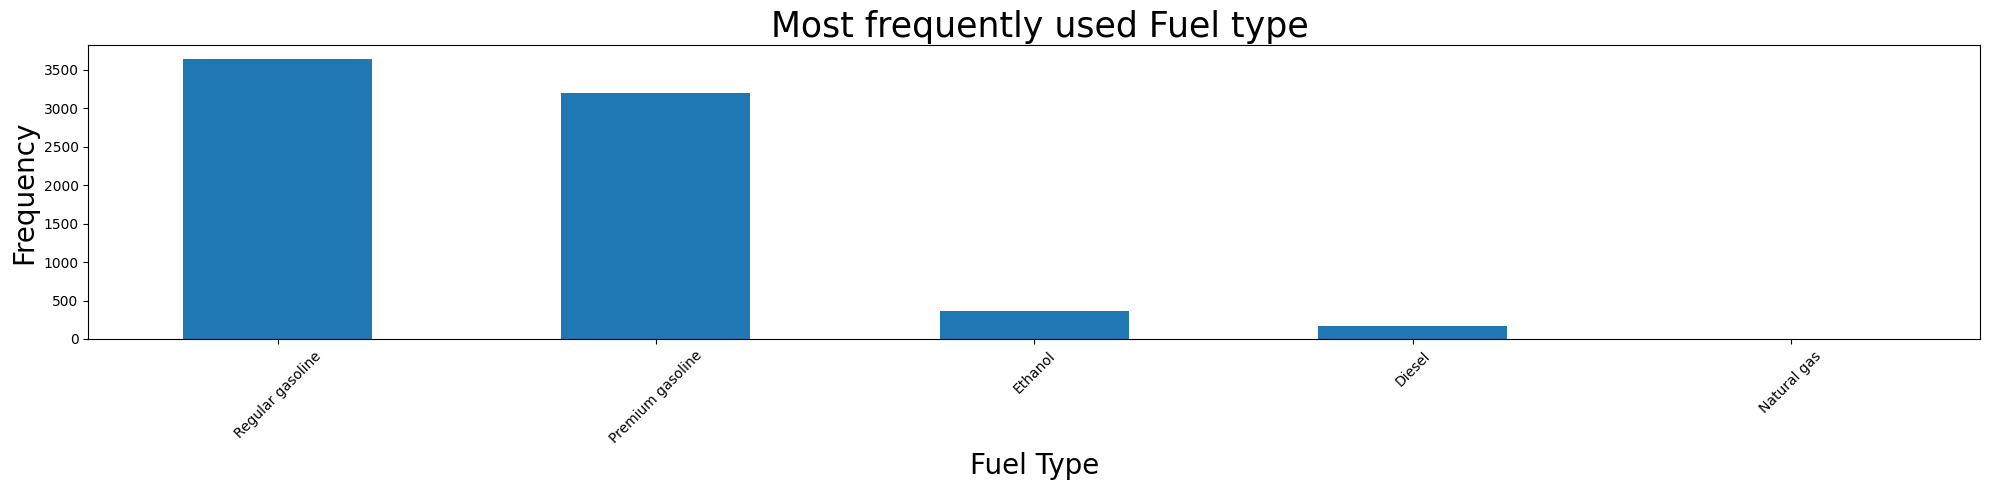

In [25]:
# Fuel Type

plt.figure(figsize=(20,5))

ds.groupby('Fuel Type')['Fuel Type'].count().sort_values(ascending=False).plot(kind='bar')

plt.title(' Most frequently used Fuel type', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

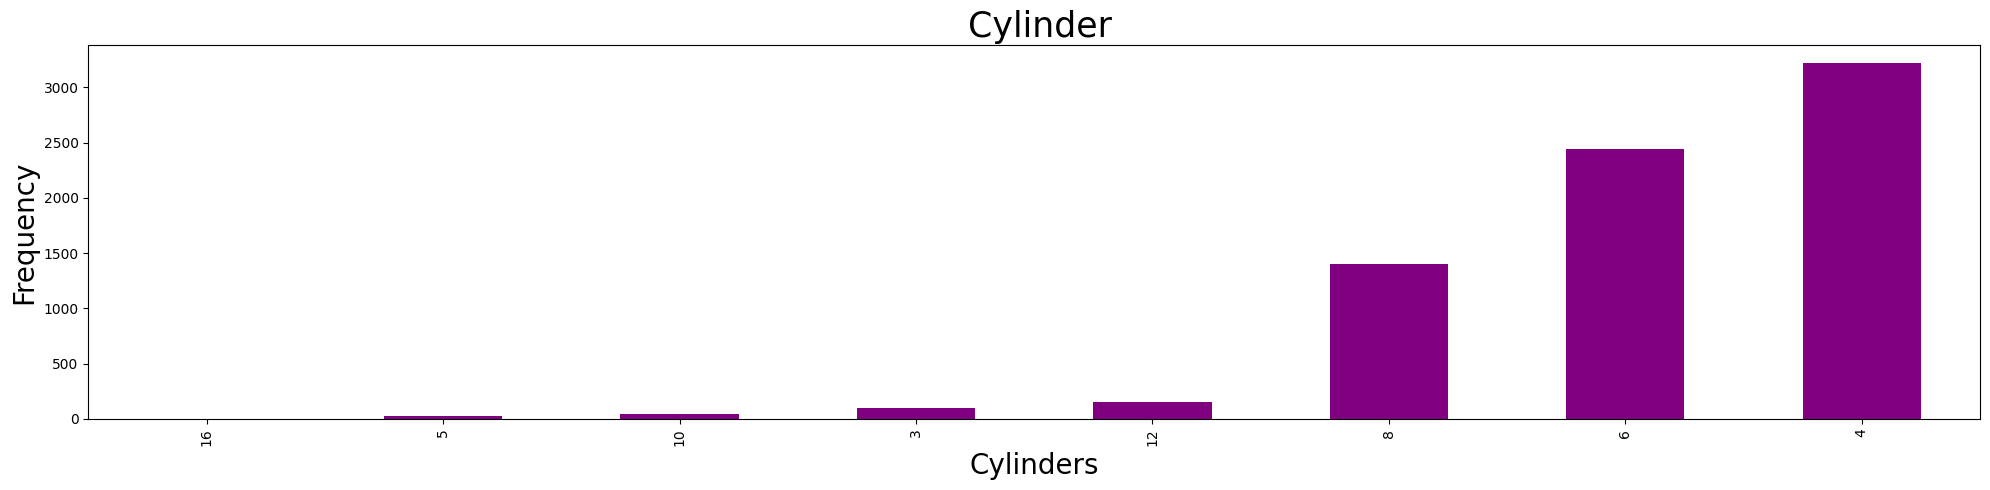

In [26]:
# Cylinders

plt.figure(figsize=(20,5))

ds.groupby('Cylinders')['Cylinders'].count().sort_values(ascending=True).plot(kind='bar', color='purple')

plt.title(' Cylinder', fontsize=25)
plt.xlabel('Cylinders', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

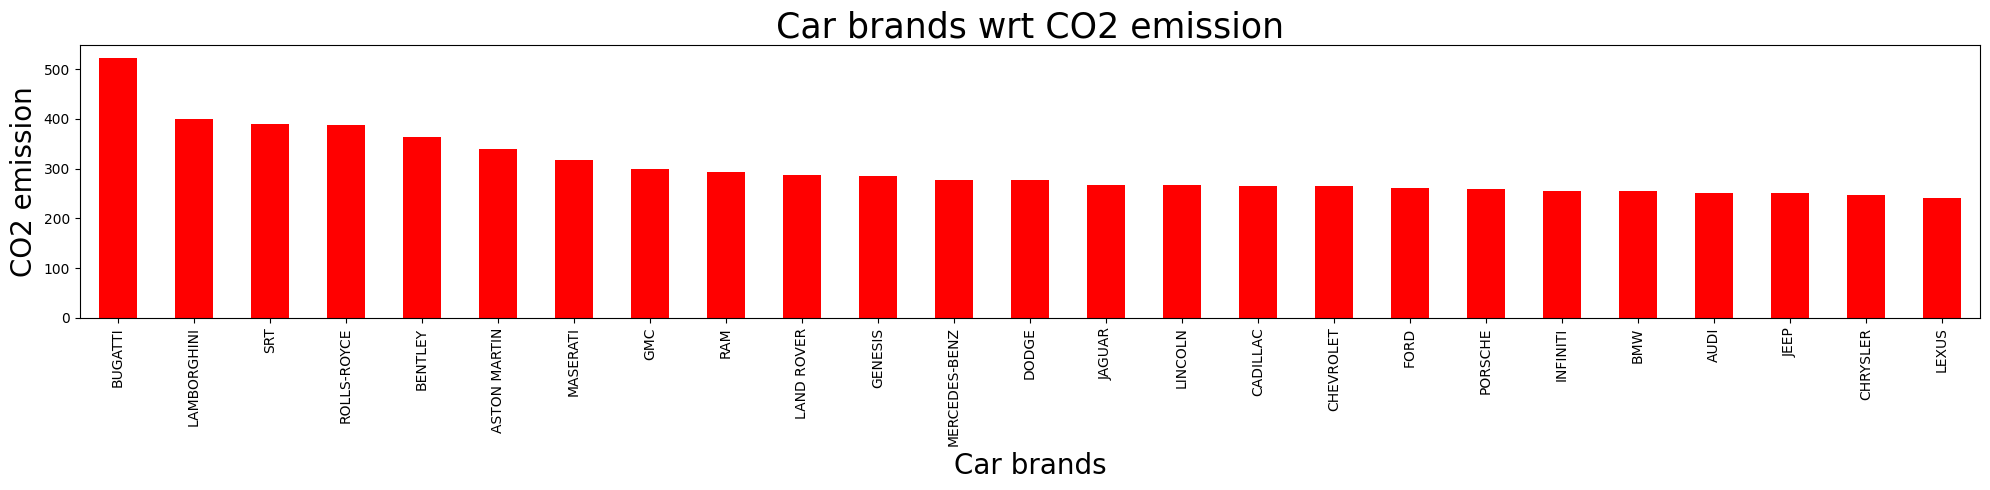

In [27]:
# Visualisation wrt CO2 emision

plt.figure(figsize=(20,5))

ds.groupby('Make')['CO2_emission'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='red')

plt.title('Car brands wrt CO2 emission', fontsize=25)
plt.xlabel('Car brands', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

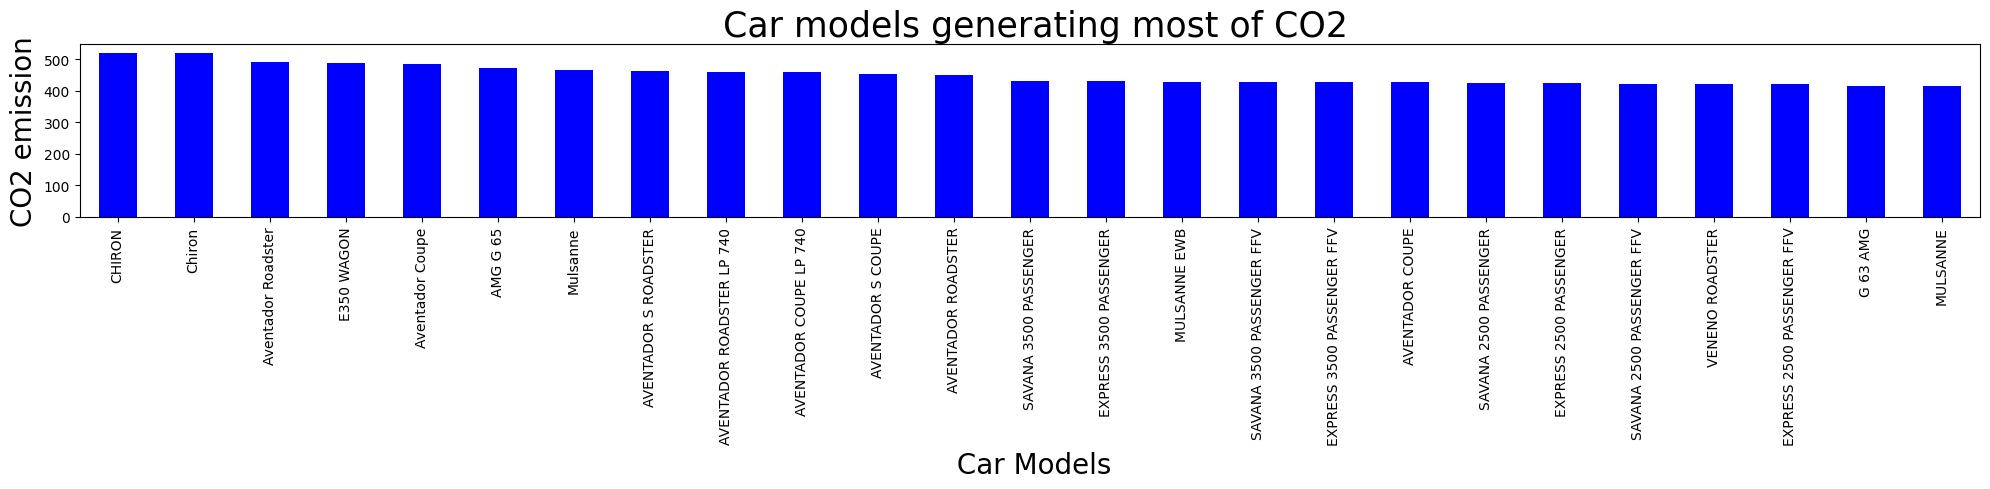

In [28]:
plt.figure(figsize=(20,5))

ds.groupby('Model')['CO2_emission'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='blue')

plt.title(' Car models generating most of CO2', fontsize=25)
plt.xlabel(' Car Models', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

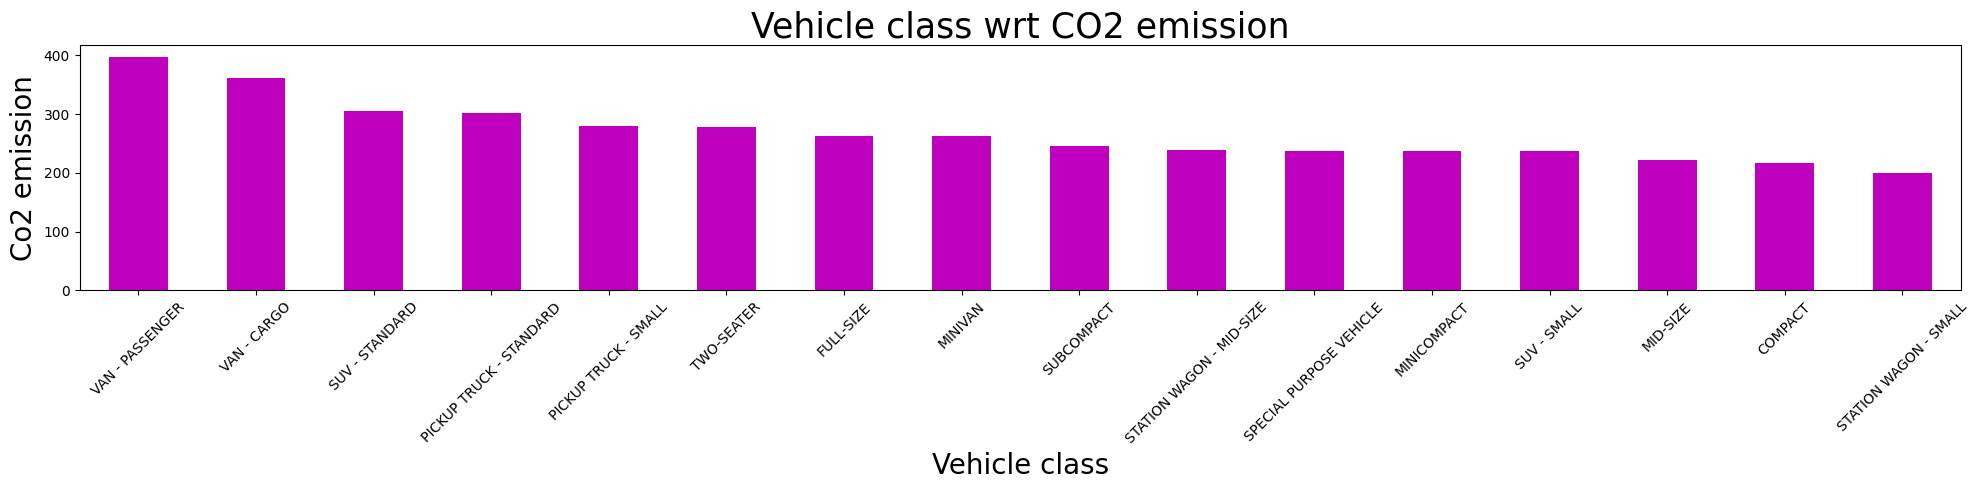

In [29]:
plt.figure(figsize=(20,5))

ds.groupby('Vehicle Class')['CO2_emission'].mean().sort_values(ascending=False).plot(kind='bar',color='m')

plt.title('Vehicle class wrt CO2 emission', fontsize=25)
plt.xlabel('Vehicle class' , fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

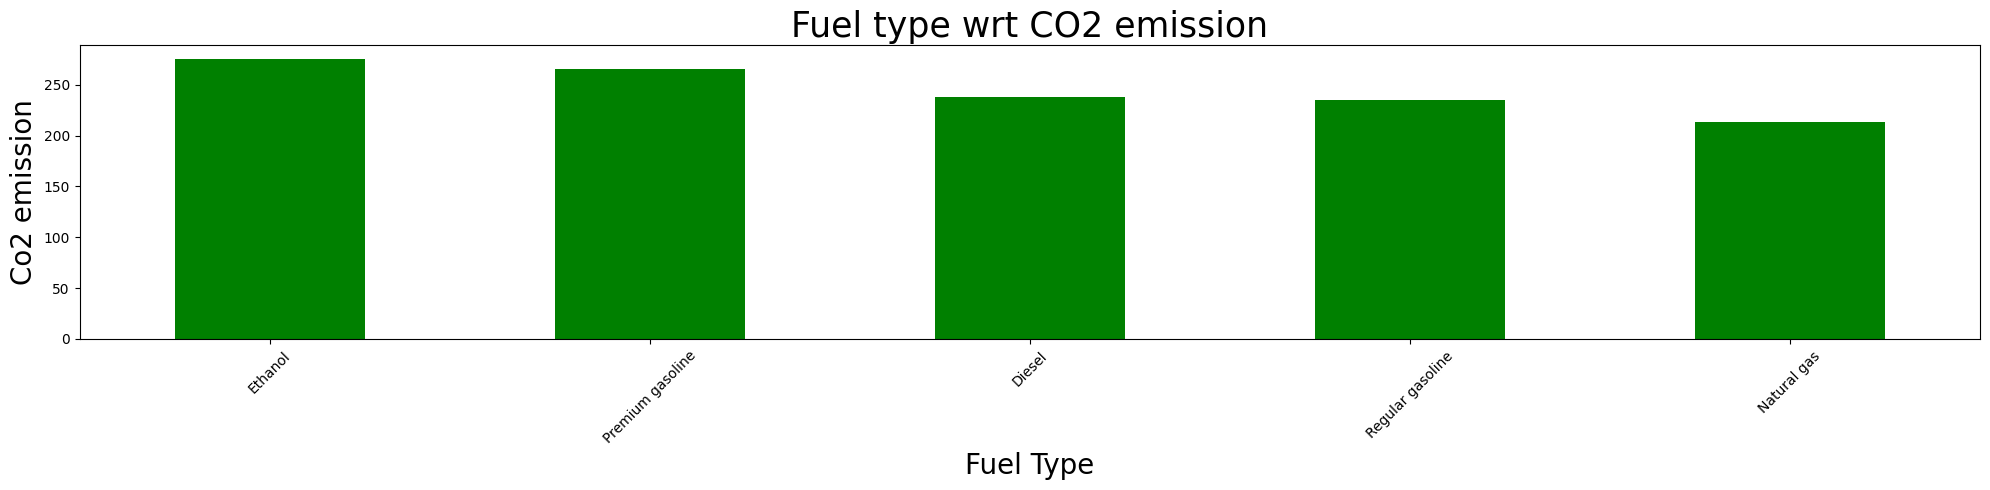

In [30]:
plt.figure(figsize=(20,5))

ds.groupby('Fuel Type')['CO2_emission'].mean().sort_values(ascending=False).plot(kind='bar',color='g')

plt.title('Fuel type wrt CO2 emission', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

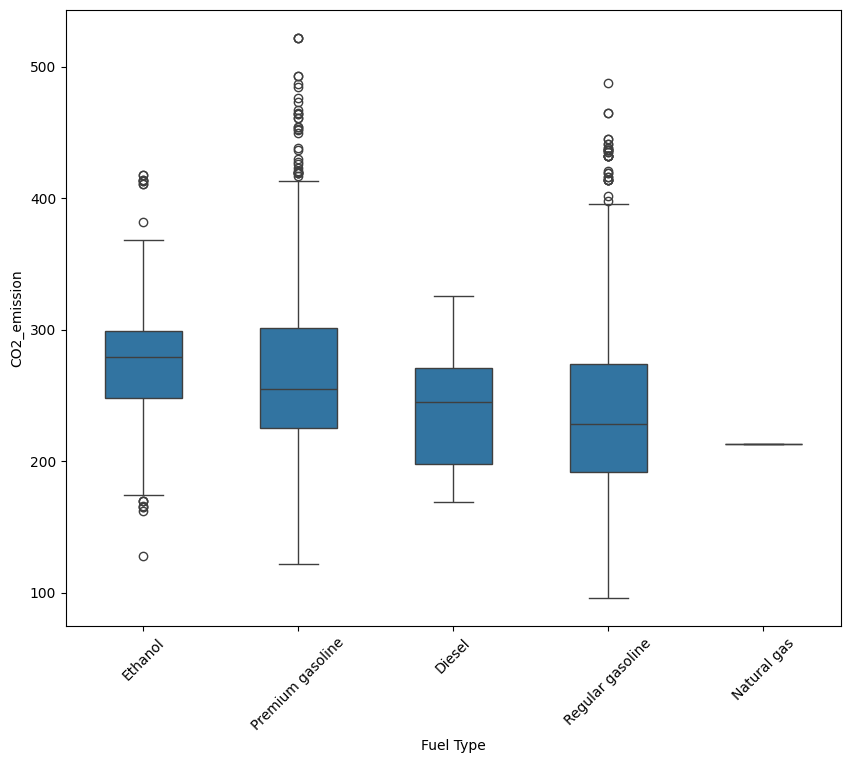

In [31]:
fuel_type = ds.groupby('Fuel Type')['CO2_emission'].median().sort_values(ascending=False).index
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Fuel Type', y='CO2_emission', data =ds, order=fuel_type, width=0.5)
plt.xticks(rotation=45, horizontalalignment='center')

plt.show()

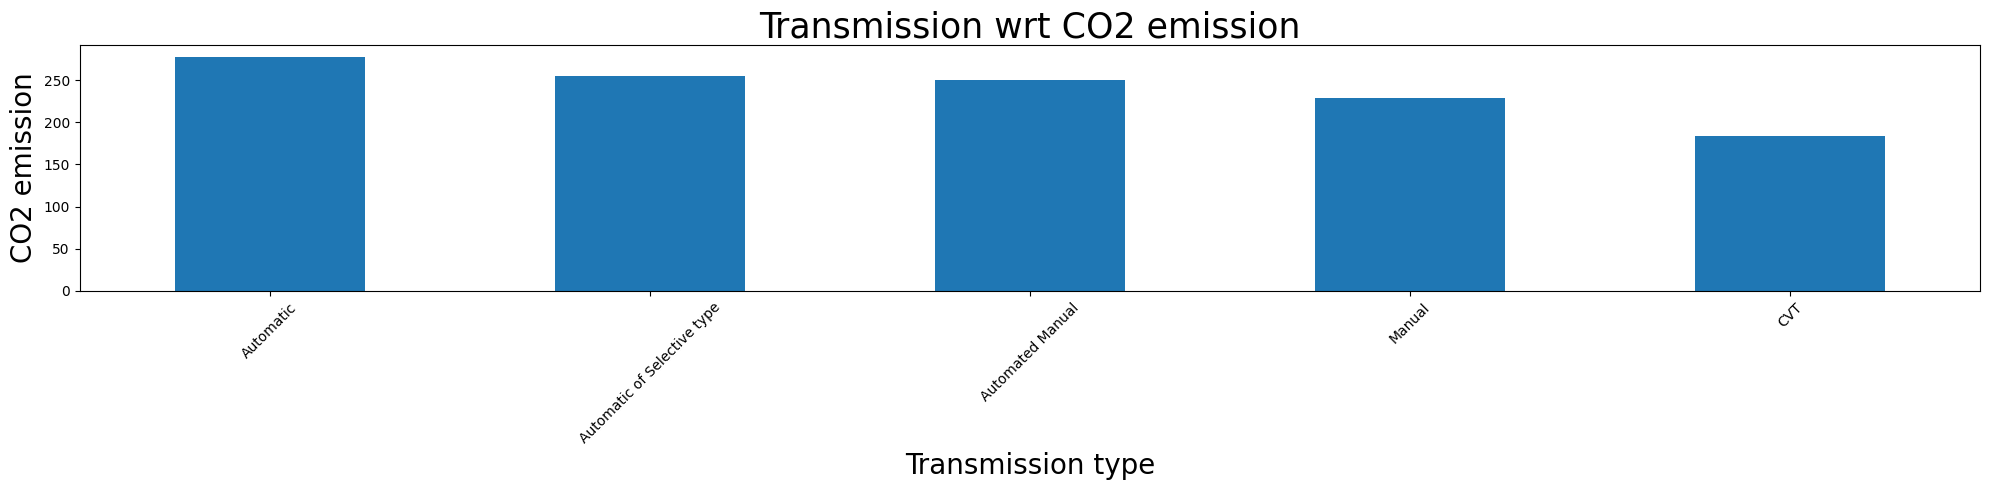

In [32]:
plt.figure(figsize=(20,5))

ds.groupby('Transmission')['CO2_emission'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title('Transmission wrt CO2 emission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

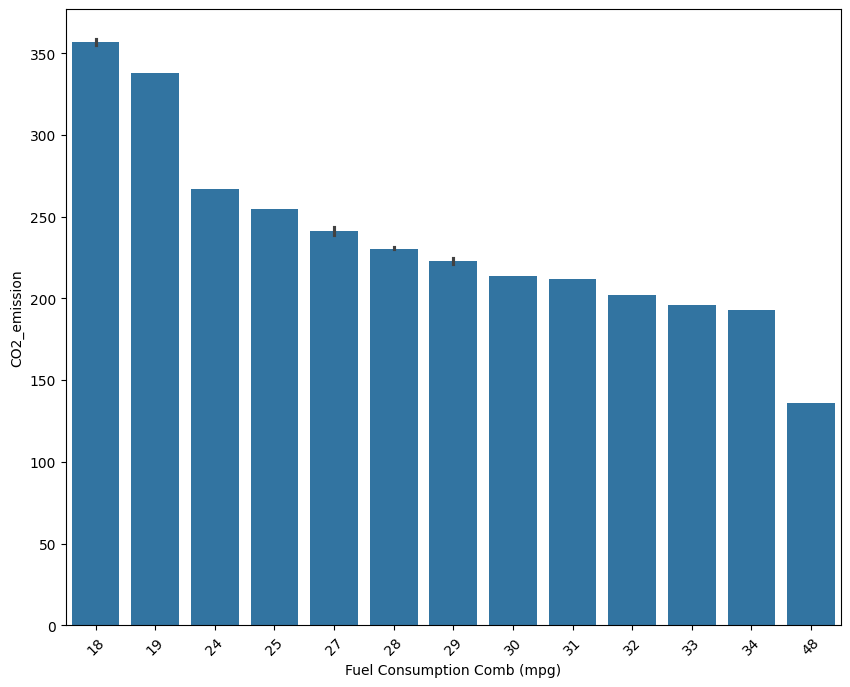

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Fuel Consumption Comb (mpg)', y='CO2_emission', data =ds[:25])

plt.xticks(rotation=45)
plt.show()

<Figure size 1000x800 with 0 Axes>

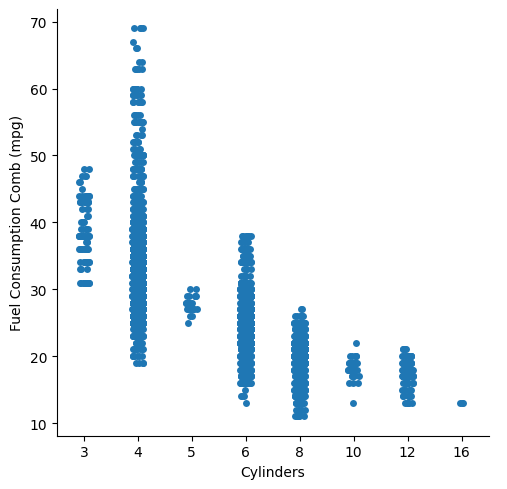

In [34]:
plt.figure(figsize=(10,8))

sns.catplot(x='Cylinders', y='Fuel Consumption Comb (mpg)',data = ds)

plt.show()

<Figure size 1000x800 with 0 Axes>

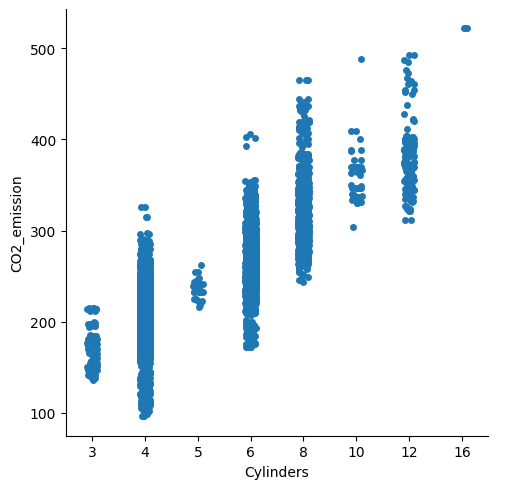

In [35]:
plt.figure(figsize=(10,8))

sns.catplot(x='Cylinders', y='CO2_emission',data = ds)

plt.show()                                # co2 emission increases with increasing no of cylinders

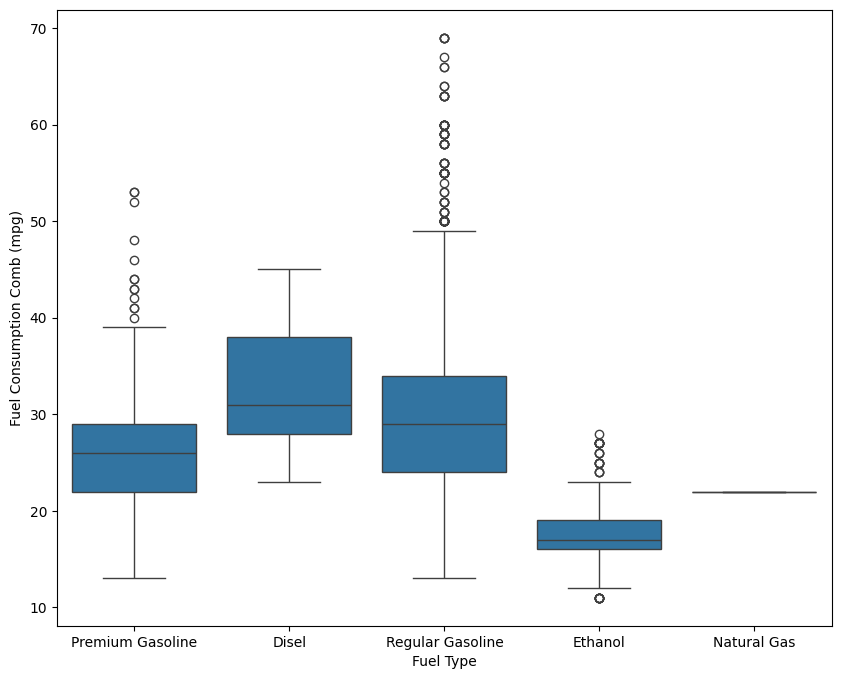

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Fuel Type', y='Fuel Consumption Comb (mpg)', data =ds)

plt.xticks([0,1,2,3,4],['Premium Gasoline','Disel', 'Regular Gasoline','Ethanol', 'Natural Gas'])
plt.show()                           # efficiency of fuel

In [37]:
# DATA PREPROCESSING

ds.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244


In [38]:
ds['Transmission'].value_counts()

Automatic of Selective type    3127
Automatic                      1851
Manual                         1185
Automated Manual                646
CVT                             576
Name: Transmission, dtype: int64

In [39]:
ds['Fuel Type'].value_counts()

Regular gasoline    3637
Premium gasoline    3202
Ethanol              370
Diesel               175
Natural gas            1
Name: Fuel Type, dtype: int64

In [40]:
# Dropping natural gas as there is only one data we have which would not make much difference in modelling

ds_N = ds[ds['Fuel Type']== 'Natural gas']

ind = ds_N.index

ds_N

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,Automatic of Selective type,Natural gas,15.2,9.5,12.7,22,213


In [41]:
for i in ind:
    ds.drop(i, axis=0, inplace=True)

In [42]:
ds[ds['Fuel Type']=='Natural gas']

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission


In [43]:
# creating dummy variables of fuel type and transmission (catagorical features)

d_v =pd.get_dummies(ds['Fuel Type'], prefix='Fuel', drop_first=True)
dv = pd.get_dummies(ds["Transmission"], drop_first=True)
d_v.head()

,Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [44]:
dv.head()

,Automatic,Automatic of Selective type,CVT,Manual
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [45]:
df = [ds, d_v,dv]

data = pd.concat(df, axis=1)
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline,Automatic,Automatic of Selective type,CVT,Manual
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196,0,1,0,0,1,0,0
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221,0,1,0,0,0,0,1
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136,0,1,0,0,0,1,0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255,0,1,0,0,1,0,0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244,0,1,0,0,1,0,0


In [46]:
data.drop(['Fuel Type'], inplace=True, axis=1)
data.drop(['Transmission'], inplace=True, axis=1)


In [47]:
df_freq = data['Make'].value_counts().to_dict()
mod_freq = data['Model'].value_counts().to_dict()
veh_freq = data['Vehicle Class'].value_counts().to_dict()

In [48]:
data['Make'] = data['Make'].map(df_freq)
data['Model'] = data['Model'].map(mod_freq)
data['Vehicle Class'] = data['Vehicle Class'].map(veh_freq)

In [49]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline,Automatic,Automatic of Selective type,CVT,Manual
0,72,9,1022,2.0,4,9.9,6.7,8.5,33,196,0,1,0,0,1,0,0
1,72,9,1022,2.4,4,11.2,7.7,9.6,29,221,0,1,0,0,0,0,1
2,72,2,1022,1.5,4,6.0,5.8,5.9,48,136,0,1,0,0,0,1,0
3,72,1,1217,3.5,6,12.7,9.1,11.1,25,255,0,1,0,0,1,0,0
4,72,7,1217,3.5,6,12.1,8.7,10.6,27,244,0,1,0,0,1,0,0


In [50]:
X = data.drop('CO2_emission', axis=1)
y = data['CO2_emission']

In [51]:
X.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline,Automatic,Automatic of Selective type,CVT,Manual
0,72,9,1022,2.0,4,9.9,6.7,8.5,33,0,1,0,0,1,0,0
1,72,9,1022,2.4,4,11.2,7.7,9.6,29,0,1,0,0,0,0,1
2,72,2,1022,1.5,4,6.0,5.8,5.9,48,0,1,0,0,0,1,0
3,72,1,1217,3.5,6,12.7,9.1,11.1,25,0,1,0,0,1,0,0
4,72,7,1217,3.5,6,12.1,8.7,10.6,27,0,1,0,0,1,0,0


In [52]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2_emission, dtype: int64

In [53]:
data.shape

(7384, 17)

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [55]:
ranked_feature = SelectKBest(score_func = chi2, k='all')
ordered_feature = ranked_feature.fit(X, y)


In [56]:
top_feat = pd.DataFrame(ordered_feature.scores_ , columns=['score'])
top_feat['variables'] = X.columns

In [57]:
top_feat.sort_values(by='score', ascending=False)

,score,variables
2,173723.188600,Vehicle Class
0,95021.040629,Make
8,13236.852695,Fuel Consumption Comb (mpg)
5,6232.307799,Fuel Consumption City (L/100 km)
7,4862.577319,Fuel Consumption Comb (L/100 km)
4,3412.144543,Cylinders
3,3394.028026,Engine Size(L)
6,3293.816329,Fuel Consumption Hwy (L/100 km)
1,2612.972867,Model
14,1938.744672,CVT


In [58]:
# splitting of traing testing set into X and y

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5907, 16)
(1477, 16)
(5907,)
(1477,)


In [60]:
y_test.head()

5632    368
1550    290
1128    382
6498    211
3270    193
Name: CO2_emission, dtype: int64

In [61]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler

In [62]:
scaler =StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
X_train

array([[-0.27521116, -0.68670295, -1.80962504, ..., -0.85157221,
        -0.29299418, -0.44024503],
       [-0.54676246, -0.68670295, -0.42577231, ...,  1.17429853,
        -0.29299418, -0.44024503],
       [ 1.2100082 , -0.87774305, -0.52091218, ...,  1.17429853,
        -0.29299418, -0.44024503],
       ...,
       [ 0.11826113, -0.30462276, -0.14900176, ..., -0.85157221,
         3.4130371 , -0.44024503],
       [-0.27521116, -0.30462276,  1.24061702, ..., -0.85157221,
         3.4130371 , -0.44024503],
       [-1.17299301, -1.06878314, -0.71695798, ..., -0.85157221,
        -0.29299418, -0.44024503]])

In [64]:
data['CO2_emission'].mean()

250.58978873239437

**MODEL IMPLEMENTATION(Approach1)**

**LINEAR** **REGRESSION**

In [65]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
model.intercept_

250.98357880480785

In [67]:
model.coef_

array([  0.09846243,  -0.09126632,  -0.03196586,   0.25410999,
         2.17469937,  24.28719842,  13.07132844,  20.53745833,
        -6.35439345, -30.19620392, -15.35456651, -15.09009955,
        -0.35425518,  -0.32284677,  -0.17696755,  -0.3645601 ])

In [68]:
y_pred = model.predict(X_test)
y_pred

array([359.06209907, 292.97346311, 377.59960241, ..., 341.77783102,
       193.05390931, 177.97061893])

In [69]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.918260935039376

In [70]:
r2_score(y_test, y_pred)

0.993041824997087

In [71]:
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T

In [72]:
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))

lin_pred

,pred_values,real_values
0,359.06,368.0
1,292.97,290.0
2,377.60,382.0
3,210.80,211.0
4,192.94,193.0
...,...,...
1472,233.49,235.0
1473,262.28,263.0
1474,341.78,346.0
1475,193.05,193.0


In [73]:
lin_pred['diff'] = abs(lin_pred['pred_values'] - lin_pred['real_values'])

print('mean diff: ', (abs(lin_pred['diff']).mean()))

mean diff:  2.9790589031821257


In [74]:
lin_pred.head(10)

,pred_values,real_values,diff
0,359.06,368.0,8.94
1,292.97,290.0,2.97
2,377.60,382.0,4.40
3,210.80,211.0,0.20
4,192.94,193.0,0.06
5,249.45,244.0,5.45
6,213.25,210.0,3.25
7,174.25,174.0,0.25
8,266.72,268.0,1.28
9,303.68,305.0,1.32


<ipython-input-75-ec4621a522f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test)


<Axes: xlabel='CO2_emission', ylabel='Density'>

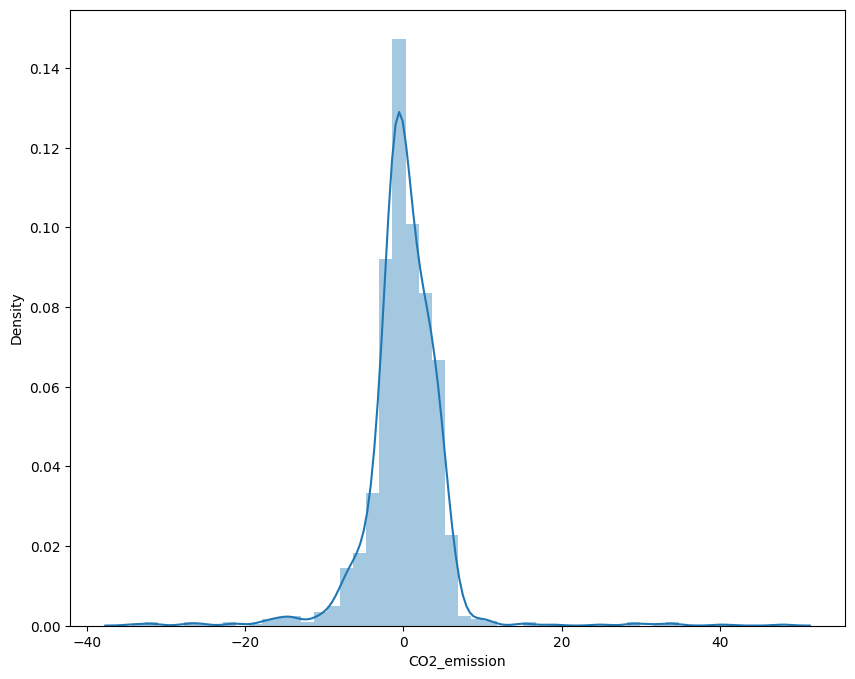

In [75]:
sns.distplot(y_pred-y_test)

Text(0, 0.5, 'y_pred')

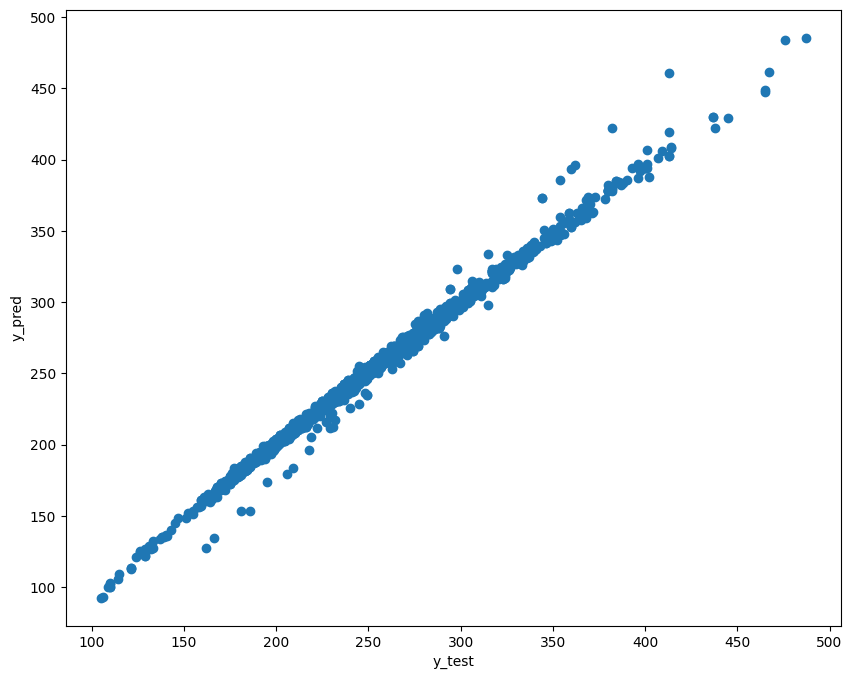

In [76]:
plt.scatter( y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

<ipython-input-77-bfa9a4ee8325>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, bins=20,color='red')


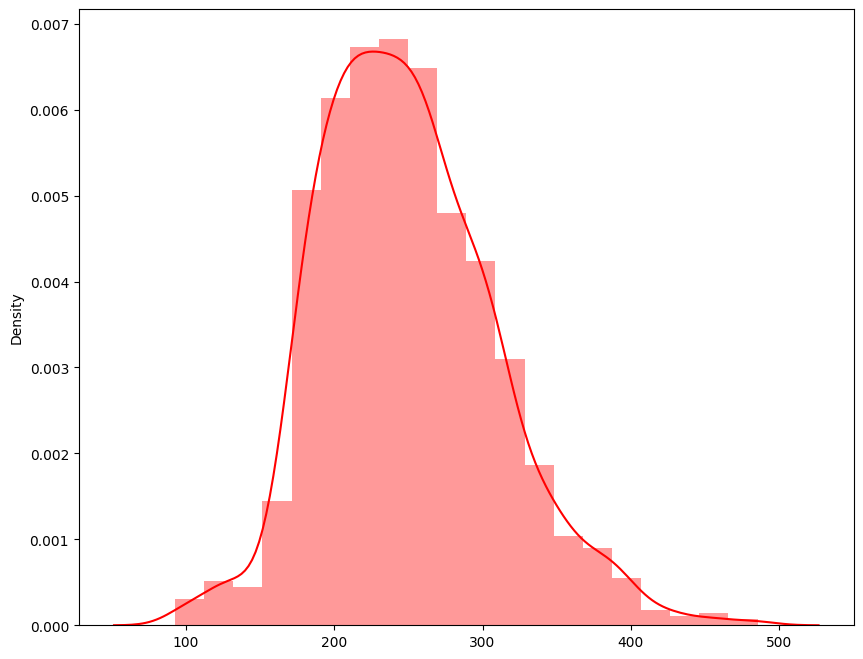

<ipython-input-77-bfa9a4ee8325>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CO2_emission'], bins=20)


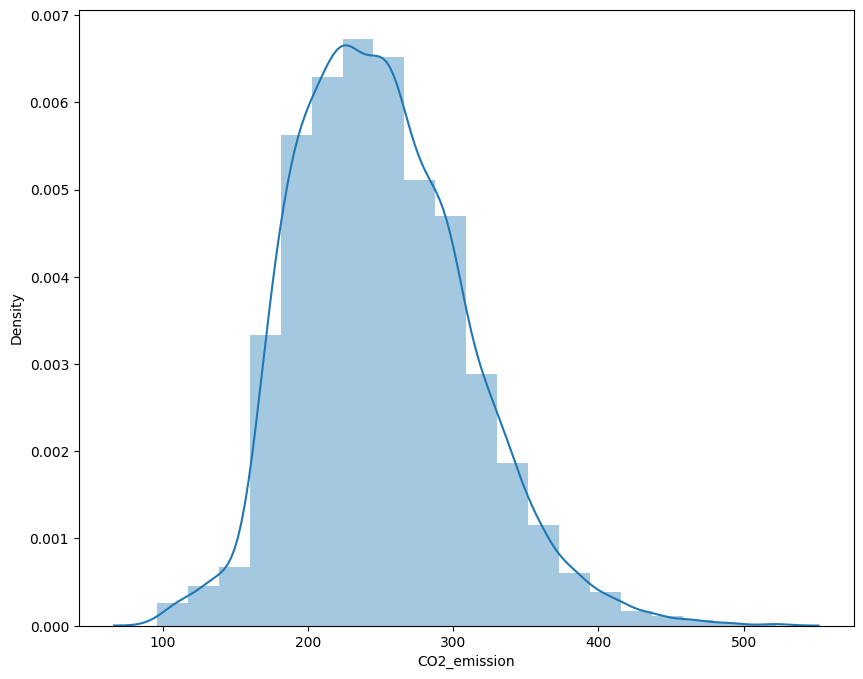

In [77]:
sns.distplot(y_pred, bins=20,color='red')
plt.show()
sns.distplot(data['CO2_emission'], bins=20)
plt.show()

**LASSO REGRESSION**

In [78]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [79]:
model.coef_

array([ 4.10688699e-02, -3.23723948e-02, -3.10957933e-02,  2.68895563e-01,
        2.36357321e+00,  3.30421624e+01,  1.77015362e+01,  6.80605134e+00,
       -6.32948570e+00, -2.86969037e+01, -1.24701105e+01, -1.23090508e+01,
        0.00000000e+00,  0.00000000e+00, -3.51753527e-02, -1.06025946e-01])

In [80]:
y_lasso_pred = model.predict(X_test)
y_lasso_pred

array([358.79551397, 292.86661453, 376.81200979, ..., 341.30500647,
       193.12483782, 178.01787383])

In [81]:
np.sqrt(mean_squared_error(y_test,y_lasso_pred ))

5.010845670292353

In [82]:
r2_score(y_lasso_pred, y_test)

0.992737024955327

In [83]:
frames = [y_lasso_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred

,0,1
0,358.795514,368.0
1,292.866615,290.0
2,376.812010,382.0
3,211.392782,211.0
4,193.370708,193.0
...,...,...
1472,233.454870,235.0
1473,262.261074,263.0
1474,341.305006,346.0
1475,193.124838,193.0


In [84]:
lasso_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
lasso_pred['pred_values'] = (lasso_pred['pred_values'].map(lambda x: round(x,2)))

lasso_pred['diff'] = abs(lasso_pred['real_values'] -lasso_pred['pred_values'])


print('mean diff: ', abs(lasso_pred['diff']).mean())

mean diff:  3.0695125253893027


In [85]:
lasso_pred.head(10)

,pred_values,real_values,diff
0,358.80,368.0,9.20
1,292.87,290.0,2.87
2,376.81,382.0,5.19
3,211.39,211.0,0.39
4,193.37,193.0,0.37
5,249.53,244.0,5.53
6,213.50,210.0,3.50
7,174.49,174.0,0.49
8,266.69,268.0,1.31
9,303.63,305.0,1.37


<ipython-input-86-95e325bc4a9a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_lasso_pred-y_test)


<Axes: xlabel='CO2_emission', ylabel='Density'>

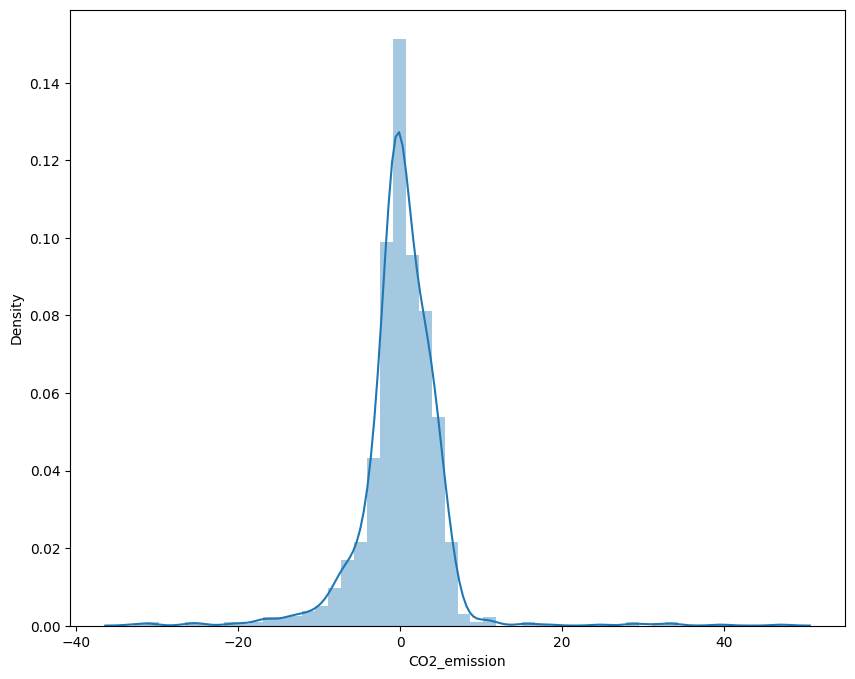

In [86]:
sns.distplot(y_lasso_pred-y_test)

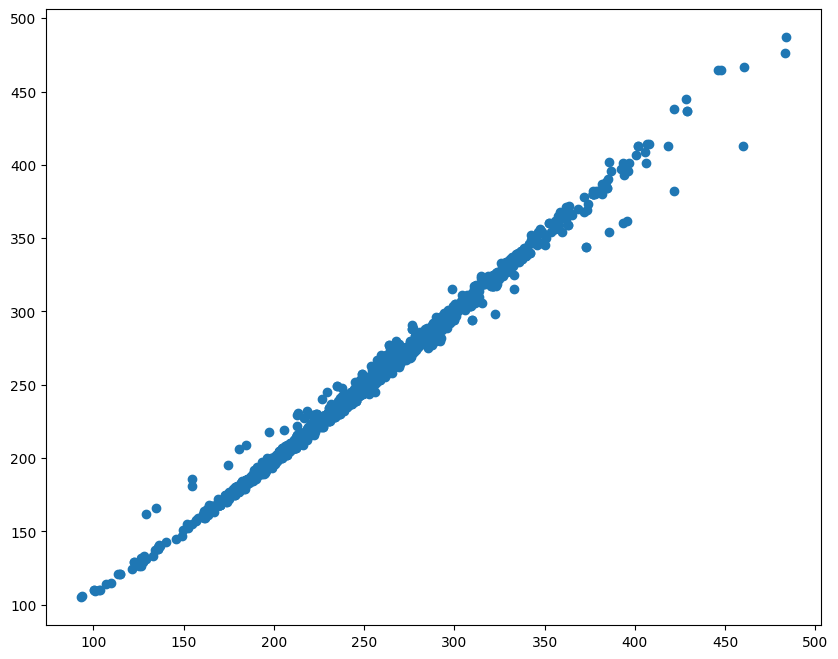

In [87]:
plt.scatter(y_lasso_pred, y_test)

<ipython-input-88-e070e596c56b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_lasso_pred, bins=20,color='red')


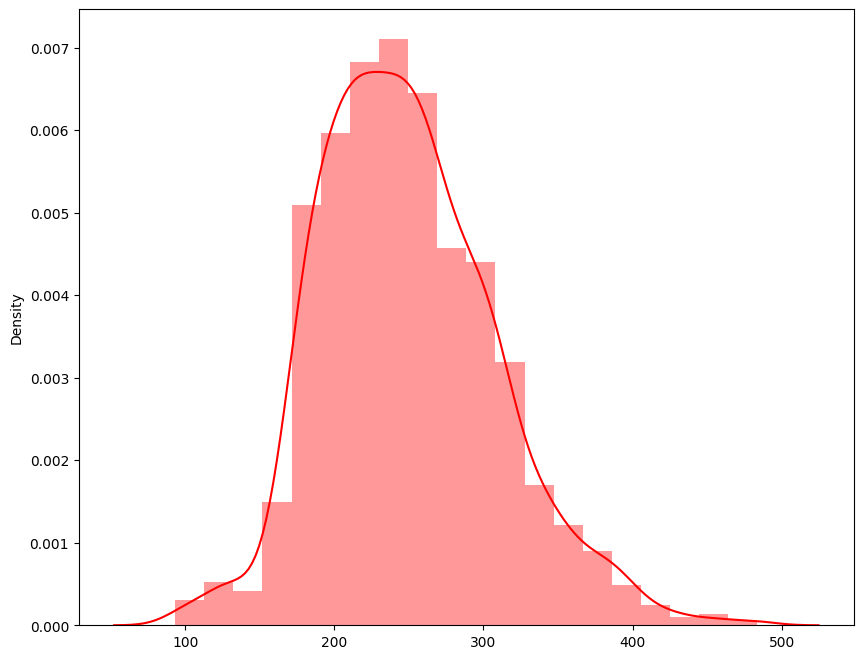

<ipython-input-88-e070e596c56b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CO2_emission'], bins=20)


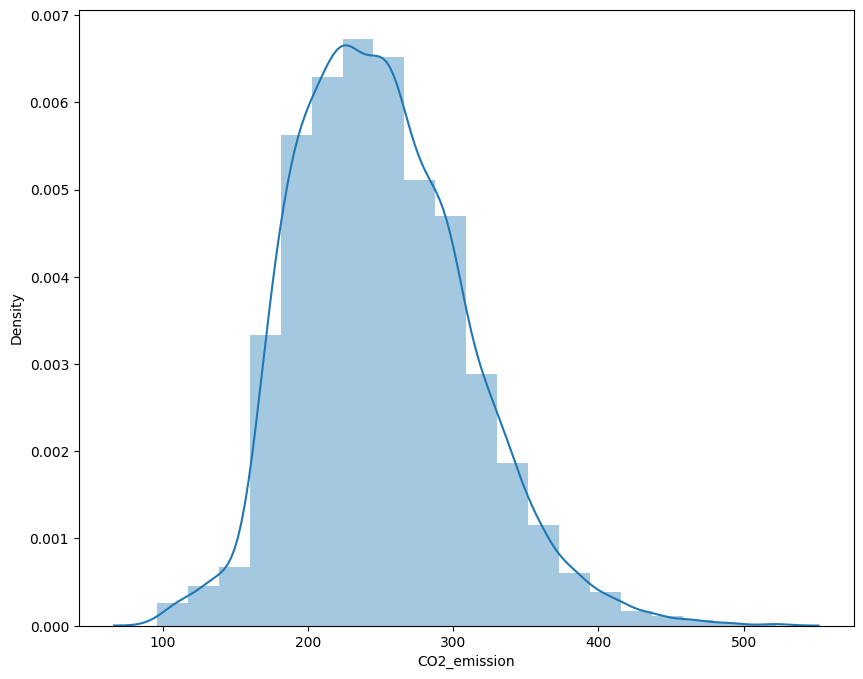

In [88]:
sns.distplot(y_lasso_pred, bins=20,color='red')
plt.show()
sns.distplot(data['CO2_emission'], bins=20)
plt.show()

**Ridge regression**

In [89]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [90]:
model.intercept_

250.98357880480785

In [91]:
model.coef_

array([  0.0984104 ,  -0.09161414,  -0.03223331,   0.25580399,
         2.17649331,  24.2725577 ,  13.06941374,  20.54613454,
        -6.35749929, -30.18992822, -15.34561823, -15.08115297,
        -0.35389225,  -0.32251485,  -0.17744887,  -0.3643426 ])

In [92]:
y_ridge = model.predict(X_test)
y_ridge

array([359.0601953 , 292.97099692, 377.58926686, ..., 341.77795347,
       193.05354166, 177.97161533])

In [93]:
np.sqrt(mean_squared_error(y_ridge,y_test))

4.918236521330602

In [94]:
r2_score(y_test,y_ridge)

0.9930418940761534

In [95]:
frames = [y_ridge, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred

,0,1
0,359.060195,368.0
1,292.970997,290.0
2,377.589267,382.0
3,210.799654,211.0
4,192.941632,193.0
...,...,...
1472,233.492012,235.0
1473,262.283370,263.0
1474,341.777953,346.0
1475,193.053542,193.0


In [96]:
ridge_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
ridge_pred['pred_values'] = (ridge_pred['pred_values'].map(lambda x: round(x,2)))

ridge_pred['diff'] = abs(ridge_pred['real_values'] -ridge_pred['pred_values'])


print('mean diff: ', abs(ridge_pred['diff']).mean())

mean diff:  2.9794245091401494


In [97]:
ridge_pred.head(10)

,pred_values,real_values,diff
0,359.06,368.0,8.94
1,292.97,290.0,2.97
2,377.59,382.0,4.41
3,210.80,211.0,0.20
4,192.94,193.0,0.06
5,249.45,244.0,5.45
6,213.25,210.0,3.25
7,174.25,174.0,0.25
8,266.72,268.0,1.28
9,303.68,305.0,1.32


<ipython-input-98-dfebfe22b2ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_ridge)


<Axes: xlabel='CO2_emission', ylabel='Density'>

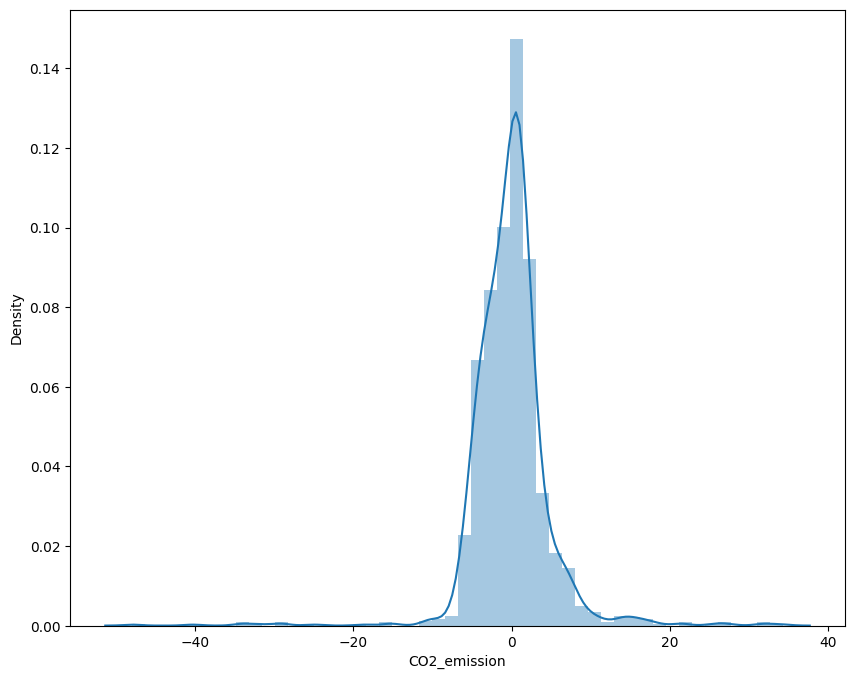

In [98]:
sns.distplot(y_test-y_ridge)

<ipython-input-99-5a9190fc13e8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_ridge, bins=20,color='red')


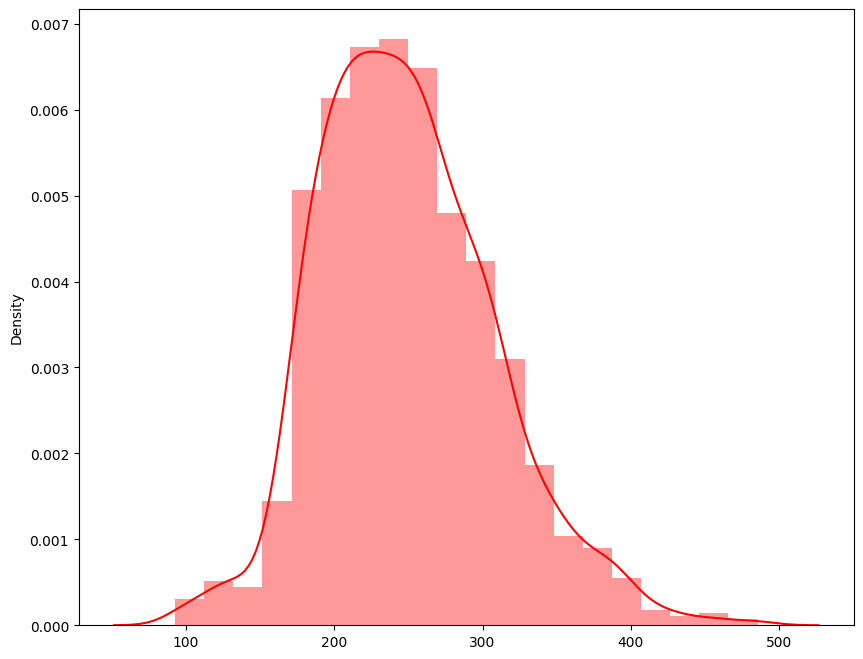

<ipython-input-99-5a9190fc13e8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CO2_emission'], bins=20)


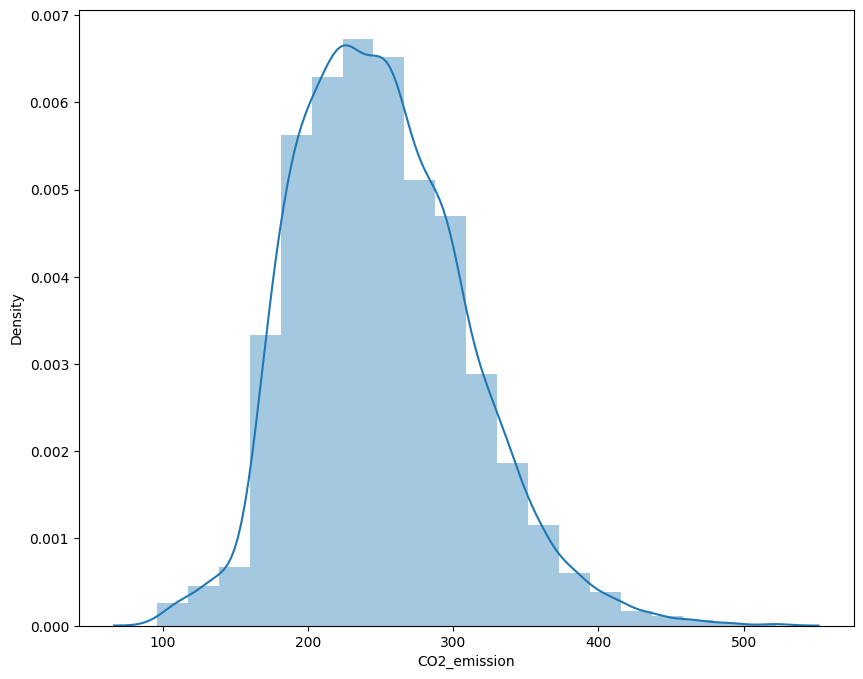

In [99]:
sns.distplot(y_ridge, bins=20,color='red')
plt.show()
sns.distplot(data['CO2_emission'], bins=20)
plt.show()

**DECISION TREE REGRESSION**

In [100]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [101]:
dtr_pred = model.predict(X_test)
dtr_pred

array([357.        , 290.        , 382.        , ..., 342.66666667,
       193.        , 177.        ])

In [102]:
np.sqrt(mean_squared_error(y_test,dtr_pred ))

3.629475553464912

In [103]:
r2_score(y_test, dtr_pred)

0.9962106914830545

In [104]:
frames = [dtr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,357.0,368.0
1,290.0,290.0
2,382.0,382.0
3,211.0,211.0
4,193.0,193.0


In [105]:
dtr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
dtr_pred['pred_values'] = (dtr_pred['pred_values'].map(lambda x: round(x,2)))

dtr_pred['diff'] = abs(dtr_pred['real_values'] -dtr_pred['pred_values'])


print('mean diff: ', abs(dtr_pred['diff']).mean())

mean diff:  1.7914691943127963


In [106]:
dtr_pred.head(10)

,pred_values,real_values,diff
0,357.0,368.0,11.0
1,290.0,290.0,0.0
2,382.0,382.0,0.0
3,211.0,211.0,0.0
4,193.0,193.0,0.0
5,244.0,244.0,0.0
6,210.0,210.0,0.0
7,174.0,174.0,0.0
8,267.0,268.0,1.0
9,304.6,305.0,0.4
